This notebook makes use of NLP and images, but does not adjust for seasonality.

In [1]:
import pandas as pd
import os

PATH_CSV = '/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/'
PATH_CAM = '/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/'

df_sales = pd.read_csv(os.path.join(PATH_CSV,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH_CSV,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH_CSV,"resturants.csv"))

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 

## Install YOLOv5

In [2]:
import sys

!git clone https://github.com/ultralytics/yolov5 --tag 6.2  # clone
!mv /kaggle/working/6.2 /kaggle/working/yolov5
%pip install -qr /kaggle/working/yolov5/requirements.txt  # install
sys.path.insert(0,'/kaggle/working/yolov5/')

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-18-gd7955fe Python-3.7.12 torch-1.11.0+cpu CPU


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 3964.5/4030.6 GB disk)


# Demonstrate YOLOv5

In [3]:
!rm -R /kaggle/working/yolov5/runs/detect/*
!mkdir /kaggle/working/images
!cp /kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2020_01_01.jpg /kaggle/working/images

rm: cannot remove '/kaggle/working/yolov5/runs/detect/*': No such file or directory


detect: weights=['yolov5s.pt'], source=/kaggle/working/images/, data=yolov5/data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.7.12 torch-1.11.0+cpu CPU

100%|███████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 104MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /kaggle/working/images/2020_01_01.jpg: 576x1024 21 persons, 1 bicycle, 1 surfboard, 478.2ms
Speed: 6.5ms pre-process, 478.2ms inference, 11.3ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to yolov5/runs/detect/exp


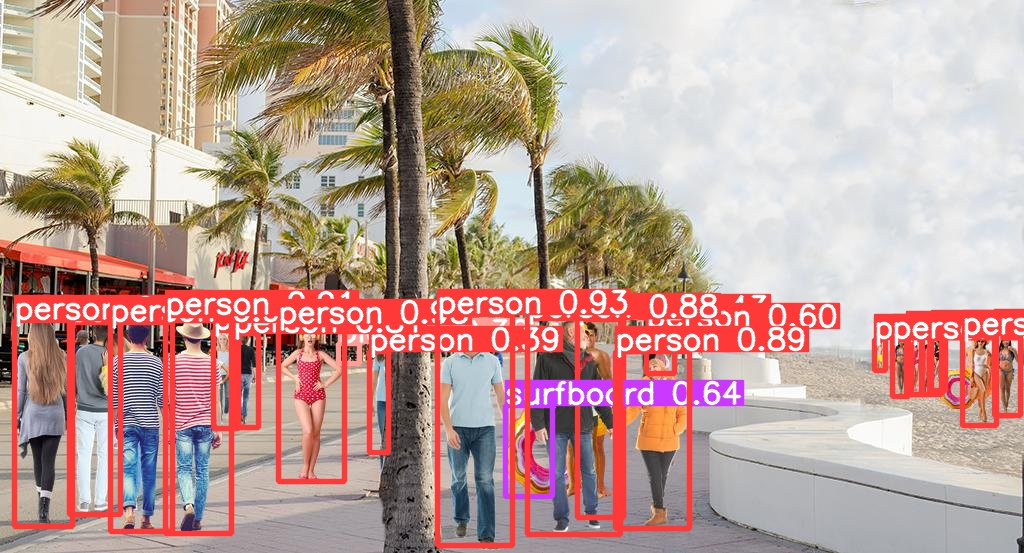

In [4]:
from IPython.display import Image

!python /kaggle/working/yolov5/detect.py --weights yolov5s.pt --img 1024 \
  --conf 0.25 --source /kaggle/working/images/

URL = '/kaggle/working/yolov5/runs/detect/exp/2020_01_01.jpg'
Image(filename=URL, width=300)

In [5]:
!ls /kaggle/working/yolov5/runs/detect/exp

2020_01_01.jpg


In [6]:
import torch

# Model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = os.path.join(PATH_CAM, '2020_01_01.jpg')

# Inference
results = yolo_model(img)

# Results
df = results.pandas().xyxy[0]
df

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.7.12 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,437.445709,313.517639,511.361420,549.585999,0.914415,0,person
1,163.331696,316.481140,228.869415,534.302063,0.911195,0,person
2,618.338257,348.500305,689.818665,527.170410,0.893984,0,person
3,278.144104,324.702759,344.918030,483.667969,0.873188,0,person
4,108.403152,325.120056,168.535934,535.506897,0.867159,0,person
5,69.738708,319.135162,117.840660,515.553894,0.846481,0,person
6,10.582499,317.657196,74.205223,527.240540,0.842721,0,person
7,525.342773,316.145172,619.498169,532.223877,0.804345,0,person
8,994.131653,333.159485,1020.869934,417.504578,0.702313,0,person
9,228.447906,332.352753,256.932281,431.276611,0.677869,0,person


# Extract Data from Street Images

In [7]:
import os
from os import walk
import datetime
import tqdm
import pandas as pd

filenames = next(walk(PATH_CAM), (None, None, []))[2]  

list_date = []
list_people = []

for file in tqdm.tqdm(filenames):
  if file=='1.jpg': continue
  filename = os.path.join(PATH_CAM, file)
  results = yolo_model(filename)
  df = results.pandas().xyxy[0]
  people = len(df[df.name=='person'])
  dt = datetime.datetime.strptime(file[:10], '%Y_%m_%d')
  list_date.append(dt)
  list_people.append(people)

df_street_view = pd.DataFrame({'date':list_date,'people':list_people})
df_street_view

100%|██████████| 1096/1096 [03:39<00:00,  5.00it/s]


,date,people
0,2020-01-04,14
1,2019-07-15,18
2,2021-09-13,18
3,2021-06-15,20
4,2019-05-31,18
...,...,...
1091,2020-08-29,21
1092,2020-08-06,16
1093,2019-03-07,16
1094,2019-09-18,19


# Neural Network Code from NLP Notebook

In [8]:
def process_title(model, name):
  v = None
  i = 0
  for word in name.split(' '):
    word = word.lower()
    if word == 'vegi': word = "vegetable"
    if word == 'smoothy': word = "malt"
    i+=1
    if v is None and word in model:
      v=model[word].copy()
    elif word in model:
      v+=model[word]
  v/=i
  return v

def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    
def drop_column(df, col):
  columns_to_drop = [('%s(t+%d)' % (col, future_span))]
  for i in range(window, 0, -1):
      columns_to_drop += [('%s(t-%d)' % (col, i))]
  df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
  df.drop([f"{col}(t)"], axis=1, inplace=True, errors='ignore')

def cat_seq(df, col):
  return to_categorical(df[col].values)

# Load the Glove Embeddings

In [9]:
!wget -c "https://nlp.stanford.edu/data/glove.6B.zip"
!unzip glove.6B.zip

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = 'glove.6B.300d.txt'
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
w2vec_model = KeyedVectors.load_word2vec_format(tmp_file)

--2022-12-02 02:50:21--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-02 02:50:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.08MB/s    in 2m 41s  

2022-12-02 02:53:04 (5.10 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  # Remove the CWD from sys.path while we load stuff.


# Engineer Time Series Features:

In [10]:
item_lookup = {}
for i, name in zip(list(df_items.id),list(df_items.name)):
  v = process_title(w2vec_model,name)
  item_lookup[i] = v

# Join the items and sales tables so that we can look up the store id for each item.
df_items2 = df_items[['id','store_id']]
df_train = df_sales.merge(df_items2,left_on='item_id',right_on='id')
df_train[['date','item_id','item_count','store_id']]

# Merge people counts (new)
temp = len(df_train)
df_train = df_train.merge(df_street_view)
assert len(df_train) == temp

# Sort/agg
df_train = df_train.sort_values('date').groupby(['item_id', 'store_id', 'date'], as_index=False)
df_train = df_train.agg({'item_count':['mean'],'people':['mean']})
df_train.columns = ['item', 'store', 'date', 'sales','people']
df_train.head()

,item,store,date,sales,people
0,1,4,2019-01-01,0.0,17.0
1,1,4,2019-01-02,0.0,16.0
2,1,4,2019-01-03,0.0,18.0
3,1,4,2019-01-04,0.0,16.0
4,1,4,2019-01-05,0.0,18.0


In [11]:
df_train['dow'] = df_train['date'].dt.dayofweek
df_train['doy'] = df_train['date'].dt.dayofyear
df_train

,item,store,date,sales,people,dow,doy
0,1,4,2019-01-01,0.0,17.0,1,1
1,1,4,2019-01-02,0.0,16.0,2,2
2,1,4,2019-01-03,0.0,18.0,3,3
3,1,4,2019-01-04,0.0,16.0,4,4
4,1,4,2019-01-05,0.0,18.0,5,5
...,...,...,...,...,...,...,...
109595,100,2,2021-12-27,0.0,11.0,0,361
109596,100,2,2021-12-28,0.0,12.0,1,362
109597,100,2,2021-12-29,0.0,14.0,2,363
109598,100,2,2021-12-30,0.0,16.0,3,364


Build the sequence data.

In [12]:
window = 29
future_span = 30
series = series_to_supervised(df_train.drop('date', axis=1), window=window, lag=future_span)

# Remove edge cases, where there were not enough values to complete a series
last_item = 'item(t-%d)' % window
last_store = 'store(t-%d)' % window
last_dow = 'dow(t-%d)' % window
last_doy = 'doy(t-%d)' % window
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]

We will predict with sales, and our engineered features.

In [13]:
import numpy as np
from keras.utils.np_utils import to_categorical   

# Label
labels_col = 'sales(t+%d)' % future_span
labels = series[labels_col]
series.drop(labels_col, axis=1, inplace=True)
series.drop('item(t+%d)' % future_span, axis=1, inplace=True)
series.drop('store(t+%d)' % future_span, axis=1, inplace=True)
series.drop('dow(t+%d)' % future_span, axis=1, inplace=True)
series.drop('doy(t+%d)' % future_span, axis=1, inplace=True)
series.drop('people(t+%d)' % future_span, axis=1, inplace=True)

# Get sales sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "doy")
drop_column(series2, "people")
sales_series = series2.values

# Day of week as a number
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "doy")
drop_column(series2, "sales")
drop_column(series2, "people")
dow_series = series2.values

# Get day of year sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "sales")
drop_column(series2, "people")
doy_series = series2.values

# Get number of people sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "sales")
drop_column(series2, "doy")
people_series = series2.values


# Create x
t1 = sales_series.reshape(sales_series.shape + (1,))
t2 = dow_series.reshape(dow_series.shape + (1,)) 
t3 = doy_series.reshape(doy_series.shape + (1,))
t4 = people_series.reshape(people_series.shape + (1,))
x1 = np.concatenate([t1,t2,t3,t4],axis=2)

In [14]:
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)

(106670, 30, 1)
(106670, 30, 1)
(106670, 30, 1)
(106670, 30, 1)


In [15]:
# Create predictors (x)
vec_size = w2vec_model['test'].shape[0]

lst = []
for item in list(series['item(t-1)']):
  lst.append(item_lookup[item])

x2 = np.concatenate(lst).reshape((series.shape[0],vec_size))

x = [x1,x2]

# Train the Network

Extract the predictors (x sequences) and the label (future prediction)

In [16]:
TEST_SIZE = 0.4

mask = np.random.random(size=x[0].shape[0])<TEST_SIZE

X_train = []
X_valid = []

for subx in x:
  X_train.append(subx[~mask])
  X_valid.append(subx[mask])

Y_train = labels.values[~mask]
Y_valid = labels.values[mask]

print('Train set shape x1:', X_train[0].shape)
print('Train set shape x2:', X_train[1].shape)
print('Validation set shape x1:', X_valid[0].shape)
print('Validation set shape x2:', X_valid[1].shape)

Train set shape x1: (63717, 30, 4)
Train set shape x2: (63717, 300)
Validation set shape x1: (42953, 30, 4)
Validation set shape x2: (42953, 300)


Construct the neural network.

In [17]:
import tensorflow as tf 
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout, concatenate, Input
import keras

epochs = 500
batch = 256
lr = 0.0003
adam = tf.keras.optimizers.Adam(lr)

model = Sequential()

A1 = Input(shape=(X_train[0].shape[1], X_train[0].shape[2]),name='A1')
A2 = Conv1D(filters=64, kernel_size=8, activation='relu')(A1)
A3 = MaxPooling1D(pool_size=2)(A2)
A4 = Flatten()(A3)
A5 = Dense(50, activation='relu')(A4)
A6 = Dropout(0.2)(A5)

B1 = Input(shape=X_train[1].shape[1],name='B1')
B2 = Dense(16, activation='relu',name='B2')(B1)

M1 = concatenate([A6,B2])
M2 = Dense(1,name='M2')(M1)

model = Model(inputs=[A1, B1],outputs=[M2])
model.compile(loss='mse', optimizer=adam)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
A1 (InputLayer)                 [(None, 30, 4)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 23, 64)       2112        A1[0][0]                         
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 11, 64)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 704)          0           max_pooling1d[0][0]              
______________________________________________________________________________________________

2022-12-02 02:57:20.915841: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Fit the neural network.

In [18]:
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

cnn_history = model.fit(X_train, Y_train, callbacks=[monitor],
    validation_data=(X_valid, Y_valid), epochs=epochs, verbose=2)

2022-12-02 02:57:22.039024: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
1992/1992 - 15s - loss: 156.4625 - val_loss: 96.1134
Epoch 2/500
1992/1992 - 11s - loss: 110.4609 - val_loss: 105.7340
Epoch 3/500
1992/1992 - 11s - loss: 106.9402 - val_loss: 121.3565
Epoch 4/500
1992/1992 - 13s - loss: 102.3096 - val_loss: 81.6215
Epoch 5/500
1992/1992 - 11s - loss: 95.4371 - val_loss: 81.5761
Epoch 6/500
1992/1992 - 10s - loss: 93.1273 - val_loss: 80.0412
Epoch 7/500
1992/1992 - 10s - loss: 93.4312 - val_loss: 83.3442
Epoch 8/500
1992/1992 - 13s - loss: 85.7546 - val_loss: 87.1150
Epoch 9/500
1992/1992 - 11s - loss: 87.8369 - val_loss: 82.8177
Epoch 10/500
1992/1992 - 11s - loss: 90.7143 - val_loss: 81.8428
Epoch 11/500
1992/1992 - 11s - loss: 90.4290 - val_loss: 77.1793
Epoch 12/500
1992/1992 - 10s - loss: 87.1474 - val_loss: 76.9878
Epoch 13/500
1992/1992 - 10s - loss: 87.5624 - val_loss: 78.4915
Epoch 14/500
1992/1992 - 11s - loss: 87.8915 - val_loss: 82.1335
Epoch 15/500
1992/1992 - 11s - loss: 86.1645 - val_loss: 79.6533
Epoch 16/500
1992/1992 - 11s

Predict and evaluate the validation data.

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

cnn_train_pred = model.predict(X_train)
cnn_valid_pred = model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 8.346061705994444
Validation rmse: 8.774267951027642


Plot the training curve.

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
fig.legend()
fig.suptitle('CNN')
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.show()